K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. It is a non-parametric and lazy learning algorithm, meaning:

Non-parametric: It makes no assumptions about the underlying data distribution.

Lazy learning: It doesn’t build a model during training; instead, it memorizes the training dataset and makes predictions during inference by comparing the new data point to the existing ones.

How KNN Works
The KNN algorithm works in the following steps:

1. Choose the value of K:

K is the number of neighbors to consider when making a prediction.

For example, if k = 5, the algorithm considers the 5 nearest data points to the new data point.

2. Calculate the distance between the new data point and all points in the training dataset:
Common distance metrics:

Euclidean Distance (most common):

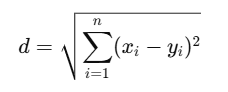

3. Identify the K nearest neighbors:

Sort the distances in ascending order.

Select the K closest points.

4. Make the prediction:

For classification, use majority voting among the K neighbors.

For regression, take the average of the K neighbors' values.

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



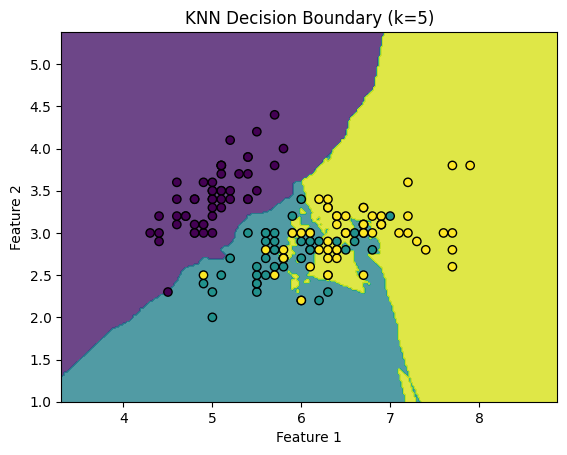

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plotting decision boundaries (for 2D visualization)
def plot_decision_boundary(X, y, model, h=0.02):
    X = X[:, :2]  # Use only 2 features for 2D plot
    model.fit(X, y)
    
    # Generate a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plotting (only using 2 features for visualization)
plot_decision_boundary(X, y, knn)
